In [ ]:
!pip install --upgrade openai

We are using list of sentences (incorporated in a single prompt) as input here

In [1]:
from openai import OpenAI
from google.colab import userdata

client = OpenAI(api_key=userdata.get('gpt-key'))

def llm_score_for_list(text_list, model, temp):
  completion = client.chat.completions.create(
      model=model,
      temperature = temp,
      n = 1,
      messages=[
        {"role": "system", "content": """You are a financial expert. Your task is to classify the financial sentiment of a given input text.
                                        For a given input, you need to output a single number only which is a sentiment score between -1 and 1.
                                        -1 corresponds to completely negative sentiment, +1 corresponds to completely positive sentiment."""},
        {"role": "user",  "content": f"""Classify the financial sentiment of the following sentences included in a list.
                                      Give a score between -1 and 1 for each element of the list. Output only the scores as a list!
                                      {text_list}"""}
      ]
    )

  return completion

In [2]:
# importing the labeled sentences from the 10K reports as a dictionary
import json
with open('./combined_labeled_sentences.json', 'r', encoding='utf-8') as f:
    sentences_dict = json.load(f)

In [ ]:
print( list(sentences_dict.keys()) )

['abt22_sentences.json', 'abt23_sentences.json', 'dal22_sentences.json', 'dal23_sentences.json', 'ehc22_sentences.json', 'ehc23_sentences.json', 'f22_sentences.json', 'f23_sentences.json', 'fdx22_sentences.json', 'fdx23_sentences.json', 'holx22_sentences.json', 'holx23_sentences.json', 'ogn22_sentences.json', 'ogn23_sentences.json', 'tsla22_sentences.json', 'tsla23_sentences.json', 'ups22_sentences.json', 'ups23_sentences.json', 'zbh22_sentences.json', 'zbh23_sentences.json']


In [ ]:
len(sentences_dict["tsla22_sentences.json"])

2078

In [3]:
# selecting the relevant-labeled sentences
for c in list(sentences_dict.keys()):
  sentences_dict.update({c: [s[0] for s in sentences_dict[c] if s[1] == 1]})

In [ ]:
len(sentences_dict["tsla22_sentences.json"])

439

In [ ]:
print(sentences_dict["tsla22_sentences.json"])

['The aggregate market value of voting stock held by non-affiliates of the registrant, as of June 30, 2022, the last day of the registrant’s most recently completed second fiscal quarter, was', '$580.48 billion (based on the closing price for shares of the registrant’s Common Stock as reported by the NASDAQ Global Select Market on June 30, 2022).', 'These forward-looking statements include, but are not limited to, statements concerning any potential future impact of the coronavirus disease (“COVID-19”) pandemic on our business, supply chain constraints, our strategy, competition, future operations and production capacity, future financial position, future revenues, projected costs, profitability, expected cost reductions, capital adequacy, expectations regarding demand and acceptance for our technologies, growth opportunities and trends in the markets in which we operate, prospects and plans and objectives of management.', 'We also strive to lower the cost of ownership for our customer

Calculation of avg. sentiment scores: takes ~30min, ~4 USD with *gpt-4o*



In [ ]:
import numpy as np

T = 0
model = "gpt-4o"
chunk_size = 10

score_dict = {}
for c in list(sentences_dict.keys()):
  text_list = [sentences_dict[c][i:i + chunk_size] for i in range(0, len(sentences_dict[c]), chunk_size)]
  score_list = []
  for l in text_list:
    scores = np.array(eval( llm_score_for_list(l, model, T).choices[0].message.content ))
    score_list = np.append(score_list, scores)
  avg_score = np.mean(score_list)
  score_dict[c] = avg_score

In [ ]:
print(score_dict)

{'abt22_sentences.json': -0.13821138211382114, 'abt23_sentences.json': -0.23224932249322497, 'dal22_sentences.json': -0.19101654846335697, 'dal23_sentences.json': -0.188, 'ehc22_sentences.json': -0.35683229813664596, 'ehc23_sentences.json': -0.37304860088365244, 'f22_sentences.json': -0.24964028776978417, 'f23_sentences.json': -0.3013392857142857, 'fdx22_sentences.json': -0.1740425531914893, 'fdx23_sentences.json': -0.29590643274853795, 'holx22_sentences.json': -0.3357815442561205, 'holx23_sentences.json': -0.3319470699432892, 'ogn22_sentences.json': -0.381021897810219, 'ogn23_sentences.json': -0.42777777777777776, 'tsla22_sentences.json': -0.2136674259681093, 'tsla23_sentences.json': -0.2537190082644628, 'ups22_sentences.json': -0.17121212121212123, 'ups23_sentences.json': -0.26546112115732373, 'zbh22_sentences.json': -0.39709443099273606, 'zbh23_sentences.json': -0.33834196891191715}


In [96]:
avg_score_dict = {'abt22_sentences.json': -0.13821138211382114, 'abt23_sentences.json': -0.23224932249322497, 'dal22_sentences.json': -0.19101654846335697, 'dal23_sentences.json': -0.188, 'ehc22_sentences.json': -0.35683229813664596, 'ehc23_sentences.json': -0.37304860088365244, 'f22_sentences.json': -0.24964028776978417, 'f23_sentences.json': -0.3013392857142857, 'fdx22_sentences.json': -0.1740425531914893, 'fdx23_sentences.json': -0.29590643274853795, 'holx22_sentences.json': -0.3357815442561205, 'holx23_sentences.json': -0.3319470699432892, 'ogn22_sentences.json': -0.381021897810219, 'ogn23_sentences.json': -0.42777777777777776, 'tsla22_sentences.json': -0.2136674259681093, 'tsla23_sentences.json': -0.2537190082644628, 'ups22_sentences.json': -0.17121212121212123, 'ups23_sentences.json': -0.26546112115732373, 'zbh22_sentences.json': -0.39709443099273606, 'zbh23_sentences.json': -0.33834196891191715}

In [97]:
score_avg_plot = []
reports = list(sentences_dict.keys())

for i in range(0, len(reports)-1, 2):
  score_avg_plot.append([avg_score_dict[reports[i]], avg_score_dict[reports[i+1]]])


print(score_avg_plot)

[[-0.13821138211382114, -0.23224932249322497], [-0.19101654846335697, -0.188], [-0.35683229813664596, -0.37304860088365244], [-0.24964028776978417, -0.3013392857142857], [-0.1740425531914893, -0.29590643274853795], [-0.3357815442561205, -0.3319470699432892], [-0.381021897810219, -0.42777777777777776], [-0.2136674259681093, -0.2537190082644628], [-0.17121212121212123, -0.26546112115732373], [-0.39709443099273606, -0.33834196891191715]]


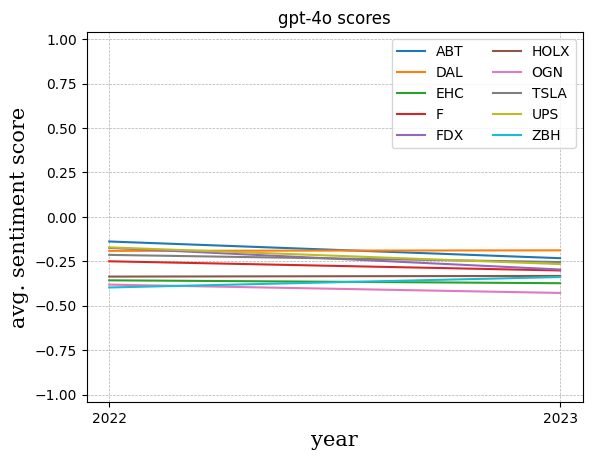

In [98]:
import matplotlib.pyplot as plt

years = [2022, 2023]
[plt.plot(years, score) for score in score_avg_plot]

font = {'family':'serif','size':15}
plt.title("gpt-4o scores")
plt.xlabel('year', fontdict = font)
plt.ylabel('avg. sentiment score', fontdict = font)
plt.ylim(-1.04, 1.04)
plt.xticks(years)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend([s.split('2')[0].upper() for s in reports][::2], ncol = 2)
plt.show()

In [99]:
delta = lambda score: (score[1] - score[0]) / abs(score[0]) *100
delta_sentiment = []

for s in score_avg_plot:
  delta_sentiment.append(delta(s))

print(delta_sentiment)

[-68.03921568627453, 1.5792079207920782, -4.5445165226597775, -20.70939687114038, -70.01958849854874, 1.1419550533445972, -12.271179225202202, -18.74482369733389, -55.0480884635696, 14.795589536206228]


In [100]:
import statistics

print(f'Average sentiment score change is: {statistics.mean(delta_sentiment):.2f}%')
#print(f'Standard Deviation is: {statistics.stdev(delta_sentiment):.2f}%')

Average sentiment score change is: -23.19%


Calculation of avg. sentiment scores: takes ~30min, ~0.4 USD with *gpt-3.5-turbo*

In [4]:
import numpy as np

T = 0
model = "gpt-3.5-turbo"
chunk_size = 10

score_dict = {}
for c in list(sentences_dict.keys()):
  text_list = [sentences_dict[c][i:i + chunk_size] for i in range(0, len(sentences_dict[c]), chunk_size)]
  score_list = []
  for l in text_list:
    scores = np.array(eval( llm_score_for_list(l, model, T).choices[0].message.content ))
    score_list = np.append(score_list, scores)
  avg_score = np.mean(score_list)
  score_dict[c] = avg_score

In [ ]:
print(score_dict)

{'abt22_sentences.json': 0.153921568627451, 'abt23_sentences.json': 0.059831460674157316, 'dal22_sentences.json': 0.06824817518248176, 'dal23_sentences.json': 0.09811046511627906, 'ehc22_sentences.json': -0.05732283464566929, 'ehc23_sentences.json': -0.07998500749625187, 'f22_sentences.json': 0.012259970457902529, 'f23_sentences.json': -0.03361669242658424, 'fdx22_sentences.json': 0.09758771929824561, 'fdx23_sentences.json': -0.05369261477045907, 'holx22_sentences.json': -0.04148936170212765, 'holx23_sentences.json': -0.051277013752455795, 'ogn22_sentences.json': -0.0788718929254302, 'ogn23_sentences.json': -0.07284090909090908, 'tsla22_sentences.json': 0.04707259953161593, 'tsla23_sentences.json': 0.041666666666666685, 'ups22_sentences.json': 0.11345029239766083, 'ups23_sentences.json': 0.0410351201478743, 'zbh22_sentences.json': -0.08345864661654134, 'zbh23_sentences.json': -0.022593582887700542}


In [5]:
print(score_dict)

{'abt22_sentences.json': 0.14902234636871506, 'abt23_sentences.json': 0.05943661971830988, 'dal22_sentences.json': 0.07518337408312957, 'dal23_sentences.json': 0.09768115942028985, 'ehc22_sentences.json': -0.04921383647798741, 'ehc23_sentences.json': -0.08130630630630631, 'f22_sentences.json': 0.0007396449704142117, 'f23_sentences.json': -0.044375963020030815, 'fdx22_sentences.json': 0.10866228070175438, 'fdx23_sentences.json': -0.048900000000000006, 'holx22_sentences.json': -0.054466019417475725, 'holx23_sentences.json': -0.057760314341846766, 'ogn22_sentences.json': -0.09188931297709925, 'ogn23_sentences.json': -0.07149321266968328, 'tsla22_sentences.json': 0.04906759906759906, 'tsla23_sentences.json': 0.02393767705382436, 'ups22_sentences.json': 0.11928294573643411, 'ups23_sentences.json': 0.03722222222222224, 'zbh22_sentences.json': -0.10263819095477388, 'zbh23_sentences.json': -0.013227513227513227}


In [9]:
avg_score_dict = {'abt22_sentences.json': 0.153921568627451, 'abt23_sentences.json': 0.059831460674157316, 'dal22_sentences.json': 0.06824817518248176, 'dal23_sentences.json': 0.09811046511627906, 'ehc22_sentences.json': -0.05732283464566929, 'ehc23_sentences.json': -0.07998500749625187, 'f22_sentences.json': 0.012259970457902529, 'f23_sentences.json': -0.03361669242658424, 'fdx22_sentences.json': 0.09758771929824561, 'fdx23_sentences.json': -0.05369261477045907, 'holx22_sentences.json': -0.04148936170212765, 'holx23_sentences.json': -0.051277013752455795, 'ogn22_sentences.json': -0.0788718929254302, 'ogn23_sentences.json': -0.07284090909090908, 'tsla22_sentences.json': 0.04707259953161593, 'tsla23_sentences.json': 0.041666666666666685, 'ups22_sentences.json': 0.11345029239766083, 'ups23_sentences.json': 0.0410351201478743, 'zbh22_sentences.json': -0.08345864661654134, 'zbh23_sentences.json': -0.022593582887700542}

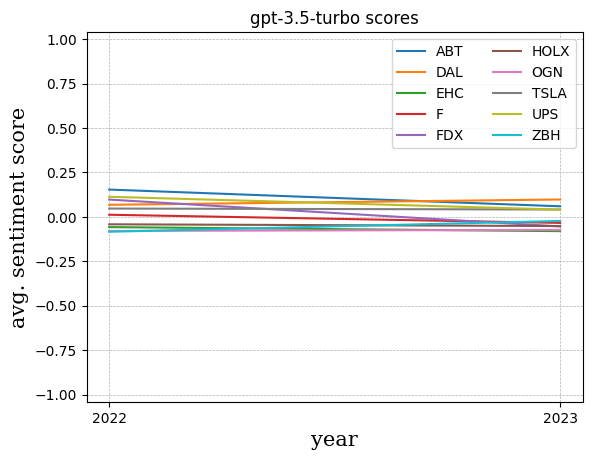

In [10]:
import matplotlib.pyplot as plt

score_avg_plot = []
years = [2022, 2023]
reports = list(sentences_dict.keys())

for i in range(0, len(reports)-1, 2):
  score_avg_plot.append([avg_score_dict[reports[i]], avg_score_dict[reports[i+1]]])

[plt.plot(years, score) for score in score_avg_plot]

font = {'family':'serif','size':15}
plt.title("gpt-3.5-turbo scores")
plt.xlabel('year', fontdict = font)
plt.ylabel('avg. sentiment score', fontdict = font)
plt.ylim(-1.04, 1.04)
plt.xticks(years)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend([s.split('2')[0].upper() for s in reports][::2], ncol = 2)
plt.show()

In [11]:
import statistics

reports = list(sentences_dict.keys())
score_avg_plot = []
delta_sentiment = []
delta = lambda score: (score[1] - score[0]) / abs(score[0]) *100

for i in range(0, len(reports)-1, 2):
  score_avg_plot.append([avg_score_dict[reports[i]], avg_score_dict[reports[i+1]]])

for s in score_avg_plot:
  delta_sentiment.append(delta(s))

print(delta_sentiment)
print('\n')
print(f'Average sentiment score change is: {statistics.mean(delta_sentiment):.2f}%')

[-61.128605167107985, 43.75544086556396, -39.53428505527455, -374.19880449153607, -155.0198479445603, -23.590751095662714, 7.646556473829206, -11.484245439469293, -63.82986832326544, 72.92840969311557]


Average sentiment score change is: -60.45%


Same scores, but averaging only the top 10% + bottom 10% of sentences





In [ ]:
import math
import numpy as np

T = 0
model = "gpt-4o"
chunk_size = 10

score_dict_2 = {}
for c in list(sentences_dict.keys()):
  text_list = [sentences_dict[c][i:i + chunk_size] for i in range(0, len(sentences_dict[c]), chunk_size)]
  score_list = []
  for l in text_list:
    scores = np.array(eval( llm_score_for_list(l, model, T).choices[0].message.content ))
    score_list = np.append(score_list, scores)
  j = math.ceil(len(score_list)/10)
  avg_score = np.mean(np.concatenate((np.sort(score_list)[:j], np.sort(score_list)[-j:])))  # avg. of top 10% and bottom 10% only
  score_dict_2[c] = avg_score

In [ ]:
print(score_dict_2)

{'abt22_sentences.json': -0.08378378378378373, 'abt23_sentences.json': -0.09054054054054053, 'dal22_sentences.json': -0.036046511627907014, 'dal23_sentences.json': -0.06428571428571433, 'ehc22_sentences.json': -0.13230769230769232, 'ehc23_sentences.json': -0.11323529411764705, 'f22_sentences.json': -0.14285714285714302, 'f23_sentences.json': -0.14999999999999994, 'fdx22_sentences.json': -0.04787234042553188, 'fdx23_sentences.json': -0.09423076923076922, 'holx22_sentences.json': -0.15000000000000005, 'holx23_sentences.json': -0.1113207547169812, 'ogn22_sentences.json': -0.20545454545454547, 'ogn23_sentences.json': -0.19666666666666666, 'tsla22_sentences.json': -0.09431818181818183, 'tsla23_sentences.json': -0.10405405405405399, 'ups22_sentences.json': -0.10660377358490566, 'ups23_sentences.json': -0.15982142857142861, 'zbh22_sentences.json': -0.1988095238095238, 'zbh23_sentences.json': -0.15256410256410258}


In [103]:
avg_score_dict = {'abt22_sentences.json': -0.08378378378378373, 'abt23_sentences.json': -0.09054054054054053, 'dal22_sentences.json': -0.036046511627907014, 'dal23_sentences.json': -0.06428571428571433, 'ehc22_sentences.json': -0.13230769230769232, 'ehc23_sentences.json': -0.11323529411764705, 'f22_sentences.json': -0.14285714285714302, 'f23_sentences.json': -0.14999999999999994, 'fdx22_sentences.json': -0.04787234042553188, 'fdx23_sentences.json': -0.09423076923076922, 'holx22_sentences.json': -0.15000000000000005, 'holx23_sentences.json': -0.1113207547169812, 'ogn22_sentences.json': -0.20545454545454547, 'ogn23_sentences.json': -0.19666666666666666, 'tsla22_sentences.json': -0.09431818181818183, 'tsla23_sentences.json': -0.10405405405405399, 'ups22_sentences.json': -0.10660377358490566, 'ups23_sentences.json': -0.15982142857142861, 'zbh22_sentences.json': -0.1988095238095238, 'zbh23_sentences.json': -0.15256410256410258}

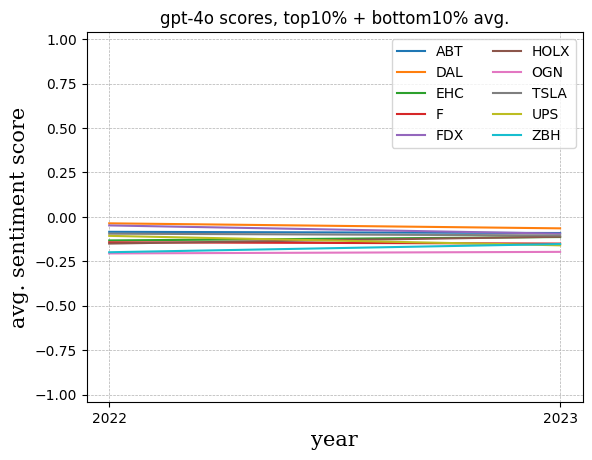

In [104]:
import matplotlib.pyplot as plt

score_avg_plot = []
years = [2022, 2023]
reports = list(sentences_dict.keys())

for i in range(0, len(reports)-1, 2):
  score_avg_plot.append([avg_score_dict[reports[i]], avg_score_dict[reports[i+1]]])

[plt.plot(years, score) for score in score_avg_plot]

font = {'family':'serif','size':15}
plt.title("gpt-4o scores, top10% + bottom10% avg.")
plt.xlabel('year', fontdict = font)
plt.ylabel('avg. sentiment score', fontdict = font)
plt.ylim(-1.04, 1.04)
plt.xticks(years)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend([s.split('2')[0].upper() for s in reports][::2], ncol = 2)
plt.show()

In [108]:
import statistics

reports = list(sentences_dict.keys())
score_avg_plot = []
delta_sentiment = []
delta = lambda score: (score[1] - score[0]) / abs(score[0]) *100

for i in range(0, len(reports)-1, 2):
  score_avg_plot.append([avg_score_dict[reports[i]], avg_score_dict[reports[i+1]]])

for s in score_avg_plot:
  delta_sentiment.append(delta(s))

print(delta_sentiment)
print('\n')
print(f'Average sentiment score change is: {statistics.mean(delta_sentiment):.2f}%')

[-8.064516129032313, -78.34101382488474, 14.415184678522591, -4.999999999999841, -96.83760683760696, 25.786163522012558, 4.277286135693229, -10.322370563334339, -49.9209860935525, 23.261169967756786]


Average sentiment score change is: -18.07%
